# Pattern matching analysis
### Author: Krzysztof Chmielewski
In this section i will compare few pattern finding algorithms. We need to import those algorithms from `utils` directory and also import suffix structures.

In [1]:
import time, psutil, os, sys
import pandas as pd

# Importing suffix structures
from ukkonen import SuffixTree
from suffix_array import SuffixArray

# Importing pattern finding algoritms from previous labs
from utils.naive_pattern_matching import naive_pattern_match
from utils.kmp_algorithm import kmp_pattern_match
from utils.boyer_moore_algorithm import boyer_moore_pattern_match
from utils.rabin_karp_algorithm import rabin_karp_pattern_match
from utils.aho_corasick_algorithm import AhoCorasick

In [2]:
def get_memory_usage():
    process = psutil.Process(os.getpid())
    return process.memory_info().rss / 1024  # in KB

In [3]:
def compare_pattern_matching_algorithms(text: str, pattern: str) -> dict:
    """
    Compare the performance of different pattern matching algorithms.
 
    Args:
        text: The text to search in
        pattern: The pattern to search for
 
    Returns:
        A dictionary containing the results of each algorithm:
        - Execution time in milliseconds
        - Memory usage in kilobytes
        - Number of character comparisons made
        - Positions where the pattern was found
    """
    prior_mem = get_memory_usage()

    # Implement algorithm comparisons
    # For each algorithm:
    #   1. Measure execution time
    #   2. Measure memory usage
    #   3. Count character comparisons
    #   4. Find pattern positions

    # Measuring time and memory usage

    # Naive algorithm time exec and mem usage
    start_time = time.time()
    naive_result, naive_compares = naive_pattern_match(text, pattern)
    end_time = time.time()
    mem_after_naive = get_memory_usage()
    naive_time_exec = (end_time - start_time) * 1000
    naive_mem_usage = mem_after_naive - prior_mem

    # Suffix array time exec and mem usage
    sa = SuffixArray(text)
    start_time = time.time()
    sa.count_compares = True
    sa_result, sa_compares = sa.find_pattern(pattern)
    end_time = time.time()
    mem_after_sa = get_memory_usage()
    sarray_time_exec = (end_time - start_time) * 1000
    sarray_mem_usage = mem_after_sa - naive_mem_usage

    # Suffix tree time exec and mem usage
    st = SuffixTree(text)
    start_time = time.time()
    st.count_compares = True
    st_result, st_compares = st.find_pattern(pattern)
    end_time = time.time()
    mem_after_st = get_memory_usage()
    stree_time_exec = (end_time - start_time) * 1000
    stree_mem_usage = mem_after_st - mem_after_sa

    # KMP time exec and mem usage
    start_time = time.time()
    kmp_result, kmp_compares = kmp_pattern_match(text, pattern)
    end_time = time.time()
    mem_after_kmp = get_memory_usage()
    kmp_time_exec = (end_time - start_time) * 1000
    kmp_mem_usage = mem_after_kmp - mem_after_st
    
    # Boyer-Moore time exec and mem usage
    start_time = time.time()
    bm_result, bm_compares = boyer_moore_pattern_match(text, pattern)
    end_time = time.time()
    mem_after_bm = get_memory_usage()
    bm_time_exec = (end_time - start_time) * 1000
    bm_mem_usage = mem_after_bm - mem_after_kmp

    # Rabin-Karp time exec and mem usage
    start_time = time.time()
    rk_result, rk_compares = rabin_karp_pattern_match(text, pattern)
    end_time = time.time()
    mem_after_rk = get_memory_usage()
    rk_time_exec = (end_time - start_time) * 1000
    rk_mem_usage = mem_after_rk - mem_after_bm

    # Aho-Corasick time exec and mem usage
    ac = AhoCorasick([pattern])
    start_time = time.time()
    ac_result, ac_compares = ac.search(text)
    end_time = time.time()
    mem_after_ac = get_memory_usage()
    ac_time_exec = (end_time - start_time) * 1000
    ac_mem_usage = mem_after_ac - mem_after_rk

    sa_result.sort()
    st_result.sort()
    kmp_result.sort()
    bm_result.sort()
    rk_result.sort()
    ac_result = [index for index, _ in ac_result]
    ac_result.sort()

    return {
        "Naive": {
            "execution_time_ms": naive_time_exec,
            "memory_usage_kb": naive_mem_usage,
            "compares": naive_compares,
            "results": naive_result
        },
        "Suffix array": {
            "execution_time_ms": sarray_time_exec,
            "memory_usage_kb": sarray_mem_usage,
            "compares": sa_compares,
            "results": sa_result
        },
        "Suffix tree": {
            "execution_time_ms": stree_time_exec,
            "memory_usage_kb": stree_mem_usage,
            "compares": st_compares,
            "results": st_result
        },
        "Knuth-Morris-Pratt": {
            "execution_time_ms": kmp_time_exec,
            "memory_usage_kb": kmp_mem_usage,
            "compares": kmp_compares,
            "results": kmp_result
        },
        "Boyer-Moore": {
            "execution_time_ms": bm_time_exec,
            "memory_usage_kb": bm_mem_usage,
            "compares": bm_compares,
            "results": bm_result
        },
        "Rabin-Karp": {
            "execution_time_ms": rk_time_exec,
            "memory_usage_kb": rk_mem_usage,
            "compares": rk_compares,
            "results": rk_result
        },
        "Aho-Corasick": {
            "execution_time_ms": ac_time_exec,
            "memory_usage_kb": ac_mem_usage,
            "compares": ac_compares,
            "results": ac_result
        }
    }

# Short text comparison

In [4]:
with open('text_samples/short.txt', 'r') as file:
    short_text = file.read()
patterns_for_short = ["ita", "Lorem", "etur adipLorema", "consectetur adipLorema elit, s", "LLLorem im daolor sit amet, consectetur adipLorema elit, sed do eiusmod Loremc i"]
print("Length of text: ", len(short_text))
for p in patterns_for_short:
    print(f"Pattern: {p} | [LENGTH]: {len(p)}")

Length of text:  100
Pattern: ita | [LENGTH]: 3
Pattern: Lorem | [LENGTH]: 5
Pattern: etur adipLorema | [LENGTH]: 15
Pattern: consectetur adipLorema elit, s | [LENGTH]: 30
Pattern: LLLorem im daolor sit amet, consectetur adipLorema elit, sed do eiusmod Loremc i | [LENGTH]: 80


## Example of pattern matching results

In [5]:
d1 = compare_pattern_matching_algorithms(short_text, patterns_for_short[0])
d1_df = pd.DataFrame(d1)
d1_df

,Naive,Suffix array,Suffix tree,Knuth-Morris-Pratt,Boyer-Moore,Rabin-Karp,Aho-Corasick
execution_time_ms,0.043869,0.026941,0.007629,0.01955,0.033617,0.031948,0.02718
memory_usage_kb,0.0,109608.0,0.0,0.0,0.0,0.0,0.0
compares,108,20,4,108,37,0,198
results,[],[],[],[],[],[],[]


# Medium text comparison

In [6]:
with open('text_samples/medium.txt', 'r') as file:
    medium_text = file.read()
patterns_for_medium = ["add", "Lorem", "Maecenas tempus", "natoque penatibus et magnis di", "enean commodo ligula eget dolor. Aenean massa. Cum sociis natoque penatibus et m"]
print("Length of text: ",len(medium_text))
for p in patterns_for_medium:
    print(f"Pattern: {p} | [LENGTH]: {len(p)}")

Length of text:  1000
Pattern: add | [LENGTH]: 3
Pattern: Lorem | [LENGTH]: 5
Pattern: Maecenas tempus | [LENGTH]: 15
Pattern: natoque penatibus et magnis di | [LENGTH]: 30
Pattern: enean commodo ligula eget dolor. Aenean massa. Cum sociis natoque penatibus et m | [LENGTH]: 80


## Example of pattern matching results

In [7]:
d2 = compare_pattern_matching_algorithms(medium_text, patterns_for_medium[0])
d2_df = pd.DataFrame(d2)
d2_df

,Naive,Suffix array,Suffix tree,Knuth-Morris-Pratt,Boyer-Moore,Rabin-Karp,Aho-Corasick
execution_time_ms,0.402451,0.07844,0.042915,0.13423,0.14329,0.24128,0.1297
memory_usage_kb,0.0,110152.0,256.0,0.0,0.0,0.0,0.0
compares,1058,38,4,1058,353,0,1998
results,[],[],[],[],[],[],[]


# Long text comparison

In [8]:
with open('text_samples/long.txt', 'r') as file:
    long_text = file.read()

patterns_for_long = ["llu", "Lorem", "scelerisque qui", "Maecenas egestas arcu quis lig", "rci sed dolor rutrum auctor. Fusce egestas elit eget lorem. Suspendisse nisl eli"]
print("Length of text: ", len(long_text))
for p in patterns_for_long:
    print(f"Pattern: {p} | [LENGTH]: {len(p)}")

Length of text:  10000
Pattern: llu | [LENGTH]: 3
Pattern: Lorem | [LENGTH]: 5
Pattern: scelerisque qui | [LENGTH]: 15
Pattern: Maecenas egestas arcu quis lig | [LENGTH]: 30
Pattern: rci sed dolor rutrum auctor. Fusce egestas elit eget lorem. Suspendisse nisl eli | [LENGTH]: 80


## Example of pattern matching results

In [9]:
d3 = compare_pattern_matching_algorithms(long_text, patterns_for_long[0])
d3_df = pd.DataFrame(d3)
d3_df

,Naive,Suffix array,Suffix tree,Knuth-Morris-Pratt,Boyer-Moore,Rabin-Karp,Aho-Corasick
execution_time_ms,3.687382,0.118971,0.015497,0.845671,0.735044,1.39451,0.672817
memory_usage_kb,0.0,160712.0,2816.0,0.0,0.0,0.0,0.0
compares,10597,59,6,10455,3810,72,19952
results,"[562, 696, 707, 903, 1938, 2210, 2309, 2567, 2...","[562, 696, 707, 903, 1938, 2210, 2309, 2567, 2...","[562, 696, 707, 903, 1938, 2210, 2309, 2567, 2...","[562, 696, 707, 903, 1938, 2210, 2309, 2567, 2...","[562, 696, 707, 903, 1938, 2210, 2309, 2567, 2...","[562, 696, 707, 903, 1938, 2210, 2309, 2567, 2...","[562, 696, 707, 903, 1938, 2210, 2309, 2567, 2..."


# Very long text comparison

In [10]:
with open('text_samples/verylong.txt', 'r') as file:
    very_long_text = file.read()

patterns_for_very_long = ["lla", "lorem", "volutpat molest", "uer turpis ut velit. Nulla sit", "Aliquam lobortis. Donec orci lectus, aliquam ut, faucibus non, euismod id, nulla"]
print("Length of text: ", len(very_long_text))
for p in patterns_for_very_long:
    print(f"Pattern: {p} | [LENGTH]: {len(p)}")

Length of text:  100000
Pattern: lla | [LENGTH]: 3
Pattern: lorem | [LENGTH]: 5
Pattern: volutpat molest | [LENGTH]: 15
Pattern: uer turpis ut velit. Nulla sit | [LENGTH]: 30
Pattern: Aliquam lobortis. Donec orci lectus, aliquam ut, faucibus non, euismod id, nulla | [LENGTH]: 80


## Example of pattern matching results

In [11]:
d4 = compare_pattern_matching_algorithms(very_long_text, patterns_for_very_long[0])
d4_df = pd.DataFrame(d4)
d4_df

,Naive,Suffix array,Suffix tree,Knuth-Morris-Pratt,Boyer-Moore,Rabin-Karp,Aho-Corasick
execution_time_ms,27.919054,0.135183,0.215292,9.335995,7.786036,14.886379,6.636858
memory_usage_kb,0.0,5012168.0,46592.0,0.0,-256.0,-2432.0,140.0
compares,105998,72,6,104356,38499,1026,199316
results,"[263, 318, 428, 722, 828, 1160, 1246, 1506, 15...","[263, 318, 428, 722, 828, 1160, 1246, 1506, 15...","[263, 318, 428, 722, 828, 1160, 1246, 1506, 15...","[263, 318, 428, 722, 828, 1160, 1246, 1506, 15...","[263, 318, 428, 722, 828, 1160, 1246, 1506, 15...","[263, 318, 428, 722, 828, 1160, 1246, 1506, 15...","[263, 318, 428, 722, 828, 1160, 1246, 1506, 15..."


# Plotting results of different pattern matching algorithms

In [12]:
import matplotlib.pyplot as plt

text_list = [short_text, medium_text, long_text, very_long_text]
pattern_lists = [patterns_for_short, patterns_for_medium, patterns_for_long, patterns_for_very_long]

## Preparing data for plotting

In [13]:
dtime = dict()
dmem = dict()
dcomp = dict()
for text, patterns in zip(text_list, pattern_lists):
    n = len(text)
    for pattern in patterns:
        m = len(pattern)
        result = compare_pattern_matching_algorithms(text, pattern)
        for algorithm in result.keys():
            dtime[(algorithm, n, m)] = result[algorithm]["execution_time_ms"]
            dmem[(algorithm, n, m)] = result[algorithm]["memory_usage_kb"]
            dcomp[(algorithm, n, m)] = result[algorithm]["compares"]

### Time execution
First we contain data results in Pandas Series so that i will be more readable and easier to access for plotting, then we are able to plot each algorithm behaviour with given text and pattern of different lengths and see how they compare to each other.

In [14]:
df_time = pd.Series(dtime)
df_time.name = 'Time execution'
df_time.index.names = ['Algorithm', 'Text Length', 'Pattern Length']
df_time.unstack()

Pattern Length                         3          5          15         30  \
Algorithm          Text Length                                               
Aho-Corasick       100           0.013828   0.013113   0.019073   0.021696   
                   1000          0.067234   0.065088   0.069380   0.081301   
                   10000         0.623465   0.560760   0.673771   0.653028   
                   100000        6.593704   6.084919   5.437374   6.139994   
Boyer-Moore        100           0.015497   0.011444   0.010014   0.011206   
                   1000          0.077248   0.057936   0.032663   0.027418   
                   10000         0.706196   0.533104   0.247002   0.176907   
                   100000        7.134914   4.673004   2.534866   1.528502   
Knuth-Morris-Pratt 100           0.011683   0.009775   0.009775   0.010967   
                   1000          0.097513   0.089169   0.089645   0.092030   
                   10000         0.853539   0.954866   0.943184   0.902653   
                   100000        8.510590   8.658171   8.447409   8.562326   
Naive              100           0.047445   0.021696   0.021935   0.033617   
                   1000          0.281811   0.210762   0.210047   0.211477   
                   10000         1.948357   2.014160   2.354383   2.075672   
                   100000       21.937370  20.533085  22.161484  22.713423   
Rabin-Karp         100           0.019073   0.017881   0.016689   0.016928   
                   1000          0.141859   0.138998   0.138521   0.150204   
                   10000         1.281738   1.304388   1.383066   1.391411   
                   100000       12.932777  12.918949  13.007164  12.869596   
Suffix array       100           0.014544   0.013351   0.013828   0.015974   
                   1000          0.022411   0.019073   0.018597   0.022173   
                   10000         0.065088   0.037193   0.054598   0.039339   
                   100000        0.155449   0.178099   0.185490   0.152111   
Suffix tree        100           0.003576   0.004292   0.006199   0.005960   
                   1000          0.003338   0.002623   0.003338   0.005245   
                   10000         0.010729   0.008106   0.008821   0.012636   
                   100000        0.217915   0.070095   0.018120   0.020981   

Pattern Length                         80  
Algorithm          Text Length             
Aho-Corasick       100           0.039101  
                   1000          0.102997  
                   10000         0.668764  
                   100000        6.066322  
Boyer-Moore        100           0.016451  
                   1000          0.027418  
                   10000         0.112772  
                   100000        0.974655  
Knuth-Morris-Pratt 100           0.012159  
                   1000          0.101089  
                   10000         0.838518  
                   100000        8.333445  
Naive              100           0.024080  
                   1000          0.213861  
                   10000         2.009392  
                   100000       21.101713  
Rabin-Karp         100           0.015736  
                   1000          0.138283  
                   10000         1.288414  
                   100000       12.947083  
Suffix array       100           0.018597  
                   1000          0.027657  
                   10000         0.051022  
                   100000        0.175953  
Suffix tree        100           0.006437  
                   1000          0.009060  
                   10000         0.014782  
                   100000        0.019550

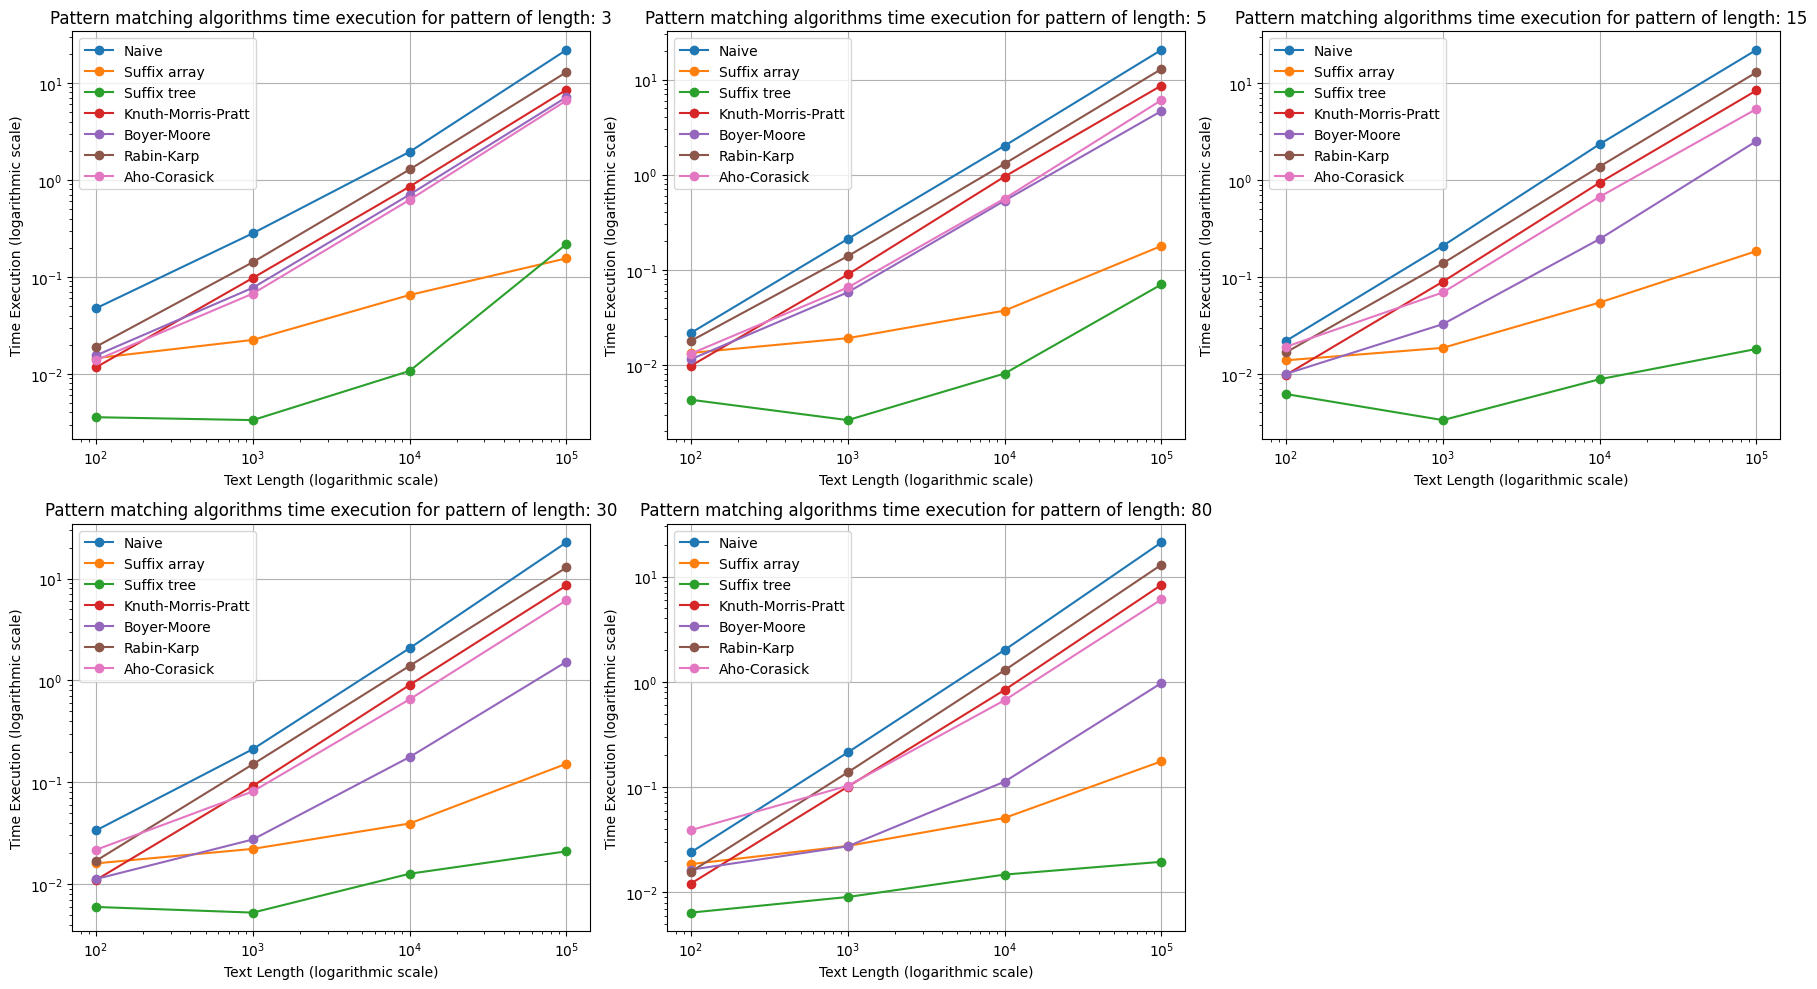

In [15]:
df_time_reset = df_time.reset_index()

algorithms = df_time_reset['Algorithm'].unique()
pattern_lengths = df_time_reset['Pattern Length'].unique()

n = len(pattern_lengths)
cols = 3
rows = (n + cols - 1) // cols

plt.figure(figsize=(cols * 6, rows * 5))

for i, pattern_len in enumerate(sorted(pattern_lengths), 1):
    plt.subplot(rows, cols, i)
    
    for algo in algorithms:
        subset = df_time_reset[(df_time_reset['Algorithm'] == algo) & 
                               (df_time_reset['Pattern Length'] == pattern_len)]
        
        plt.plot(subset['Text Length'], subset['Time execution'], marker='o', label=algo)
    
    plt.xlabel('Text Length (logarithmic scale)')
    plt.ylabel('Time Execution (logarithmic scale)')
    plt.title(f'Pattern matching algorithms time execution for pattern of length: {pattern_len}')
    plt.xscale('log')
    plt.yscale('log')
    plt.grid(True)
    plt.legend()

plt.tight_layout()
plt.show()

### Memory usage

In [16]:
df_mem = pd.Series(dmem)
df_mem.name = 'Memory usage'
df_mem.index.names = ['Algorithm', 'Text Length', 'Pattern Length']
df_mem.unstack()

Pattern Length                         3          5          15         30  \
Algorithm          Text Length                                               
Aho-Corasick       100                0.0        0.0        0.0        0.0   
                   1000               0.0        0.0        0.0        0.0   
                   10000              0.0        0.0        0.0        0.0   
                   100000             0.0        0.0        0.0        0.0   
Boyer-Moore        100                0.0        0.0        0.0        0.0   
                   1000               0.0        0.0        0.0        0.0   
                   10000              0.0        0.0        0.0        0.0   
                   100000             0.0        0.0        0.0        0.0   
Knuth-Morris-Pratt 100                0.0        0.0        0.0        0.0   
                   1000               0.0        0.0        0.0        0.0   
                   10000              0.0        0.0        0.0        0.0   
                   100000             0.0        0.0        0.0        0.0   
Naive              100                0.0        0.0        0.0        0.0   
                   1000               0.0        0.0        0.0        0.0   
                   10000              0.0        0.0        0.0        0.0   
                   100000             0.0        0.0        0.0        0.0   
Rabin-Karp         100                0.0        0.0        0.0        0.0   
                   1000               0.0        0.0        0.0        0.0   
                   10000              0.0        0.0        0.0        0.0   
                   100000           128.0        0.0        0.0        0.0   
Suffix array       100          5061956.0  5061956.0  5061956.0  5061956.0   
                   1000         5061956.0  5061956.0  5061956.0  5061956.0   
                   10000        5061956.0  5061956.0  5062724.0  5062724.0   
                   100000       5069892.0  5082264.0  5085336.0  5086872.0   
Suffix tree        100                0.0        0.0        0.0        0.0   
                   1000               0.0        0.0        0.0        0.0   
                   10000              0.0      768.0        0.0        0.0   
                   100000         11648.0        0.0        0.0      512.0   

Pattern Length                         80  
Algorithm          Text Length             
Aho-Corasick       100                0.0  
                   1000               0.0  
                   10000              0.0  
                   100000             0.0  
Boyer-Moore        100                0.0  
                   1000               0.0  
                   10000              0.0  
                   100000             0.0  
Knuth-Morris-Pratt 100                0.0  
                   1000               0.0  
                   10000              0.0  
                   100000             0.0  
Naive              100                0.0  
                   1000               0.0  
                   10000              0.0  
                   100000             0.0  
Rabin-Karp         100                0.0  
                   1000               0.0  
                   10000              0.0  
                   100000             0.0  
Suffix array       100          5061956.0  
                   1000         5061956.0  
                   10000        5062724.0  
                   100000       5087384.0  
Suffix tree        100                0.0  
                   1000               0.0  
                   10000              0.0  
                   100000             0.0

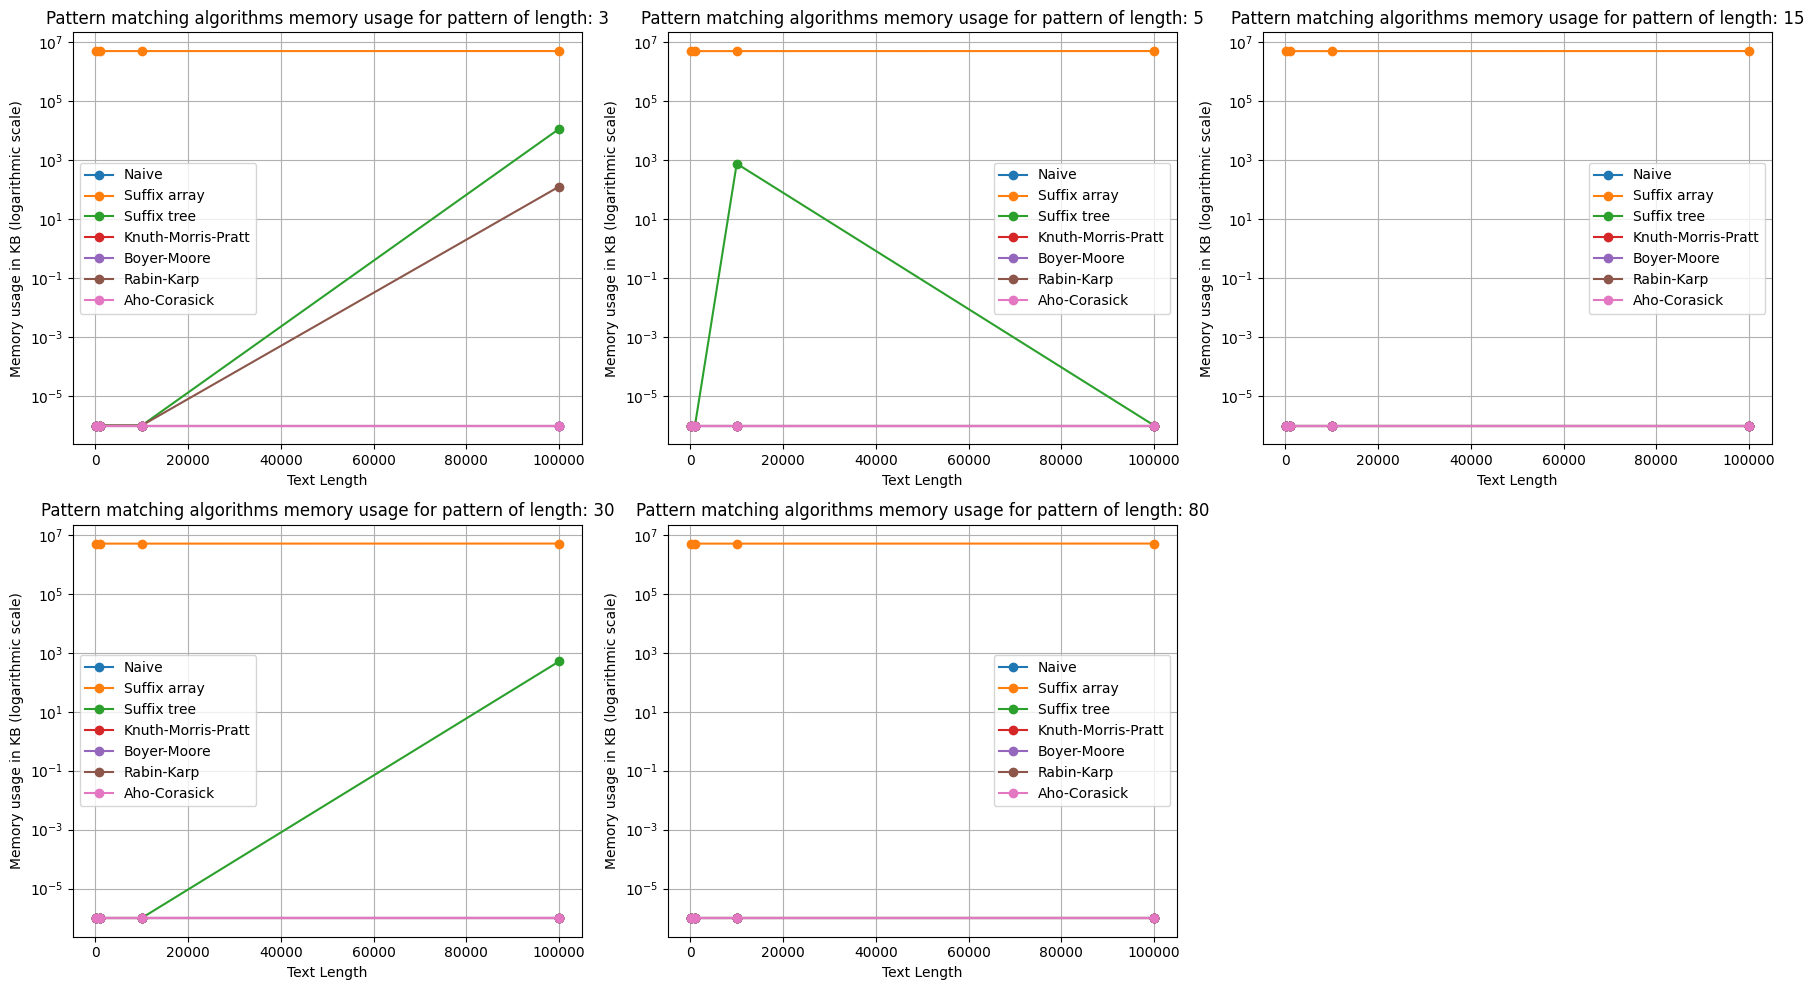

In [17]:
df_mem_reset = df_mem.reset_index()

algorithms = df_mem_reset['Algorithm'].unique()
pattern_lengths = df_mem_reset['Pattern Length'].unique()

n = len(pattern_lengths)
cols = 3
rows = (n + cols - 1) // cols

plt.figure(figsize=(cols * 6, rows * 5))

for i, pattern_len in enumerate(sorted(pattern_lengths), 1):
    plt.subplot(rows, cols, i)
    
    for algo in algorithms:
        subset = df_mem_reset[(df_mem_reset['Algorithm'] == algo) & 
                               (df_mem_reset['Pattern Length'] == pattern_len)]
        
        plt.plot(subset['Text Length'], subset['Memory usage'].replace(0, 1e-6), marker='o', label=algo)
    
    plt.xlabel('Text Length')
    plt.ylabel('Memory usage in KB (logarithmic scale)')
    plt.title(f'Pattern matching algorithms memory usage for pattern of length: {pattern_len}')
    # plt.xscale('log')
    plt.yscale('log')
    plt.grid(True)
    plt.legend()

plt.tight_layout()
plt.show()

### Number of comparisons

In [18]:
df_comp = pd.Series(dcomp)
df_comp.name = 'Characters comparison'
df_comp.index.names = ['Algorithm', 'Text Length', 'Pattern Length']
df_comp.unstack()

Pattern Length                      3       5       15      30      80
Algorithm          Text Length                                        
Aho-Corasick       100             198     188     185     171     121
                   1000           1998    1996    1986    1967    1894
                   10000         19952   19992   19915   19929   19879
                   100000       199316  199347  199299  198678  198892
Boyer-Moore        100              37      41      24      34      81
                   1000            353     255     135     111     119
                   10000          3810    2390    1138     774     598
                   100000        38499   24275   12461    8171    5799
Knuth-Morris-Pratt 100             108     102     108     102     100
                   1000           1058    1000    1000    1049    1101
                   10000         10455   10000   10685   10012   10430
                   100000       104356  104964  101114  107615  100130
Naive              100             108     110     109     101     103
                   1000           1058    1000    1000    1055    1137
                   10000         10597   10004   10758   10054   10475
                   100000       105998  105613  101801  108934  101159
Rabin-Karp         100               0      15      15      30      80
                   1000              0       5      15      30      80
                   10000            72      10      30      30      80
                   100000         1026     380     150     300     880
Suffix array       100              20      33      50      74     174
                   1000             38      28      48      94     216
                   10000            59      39     121     108     222
                   100000           72      92     178     207     502
Suffix tree        100               4       7      18      32      83
                   1000              4       6      16      34      85
                   10000             6       6      20      34      85
                   100000            6       9      19      35      84

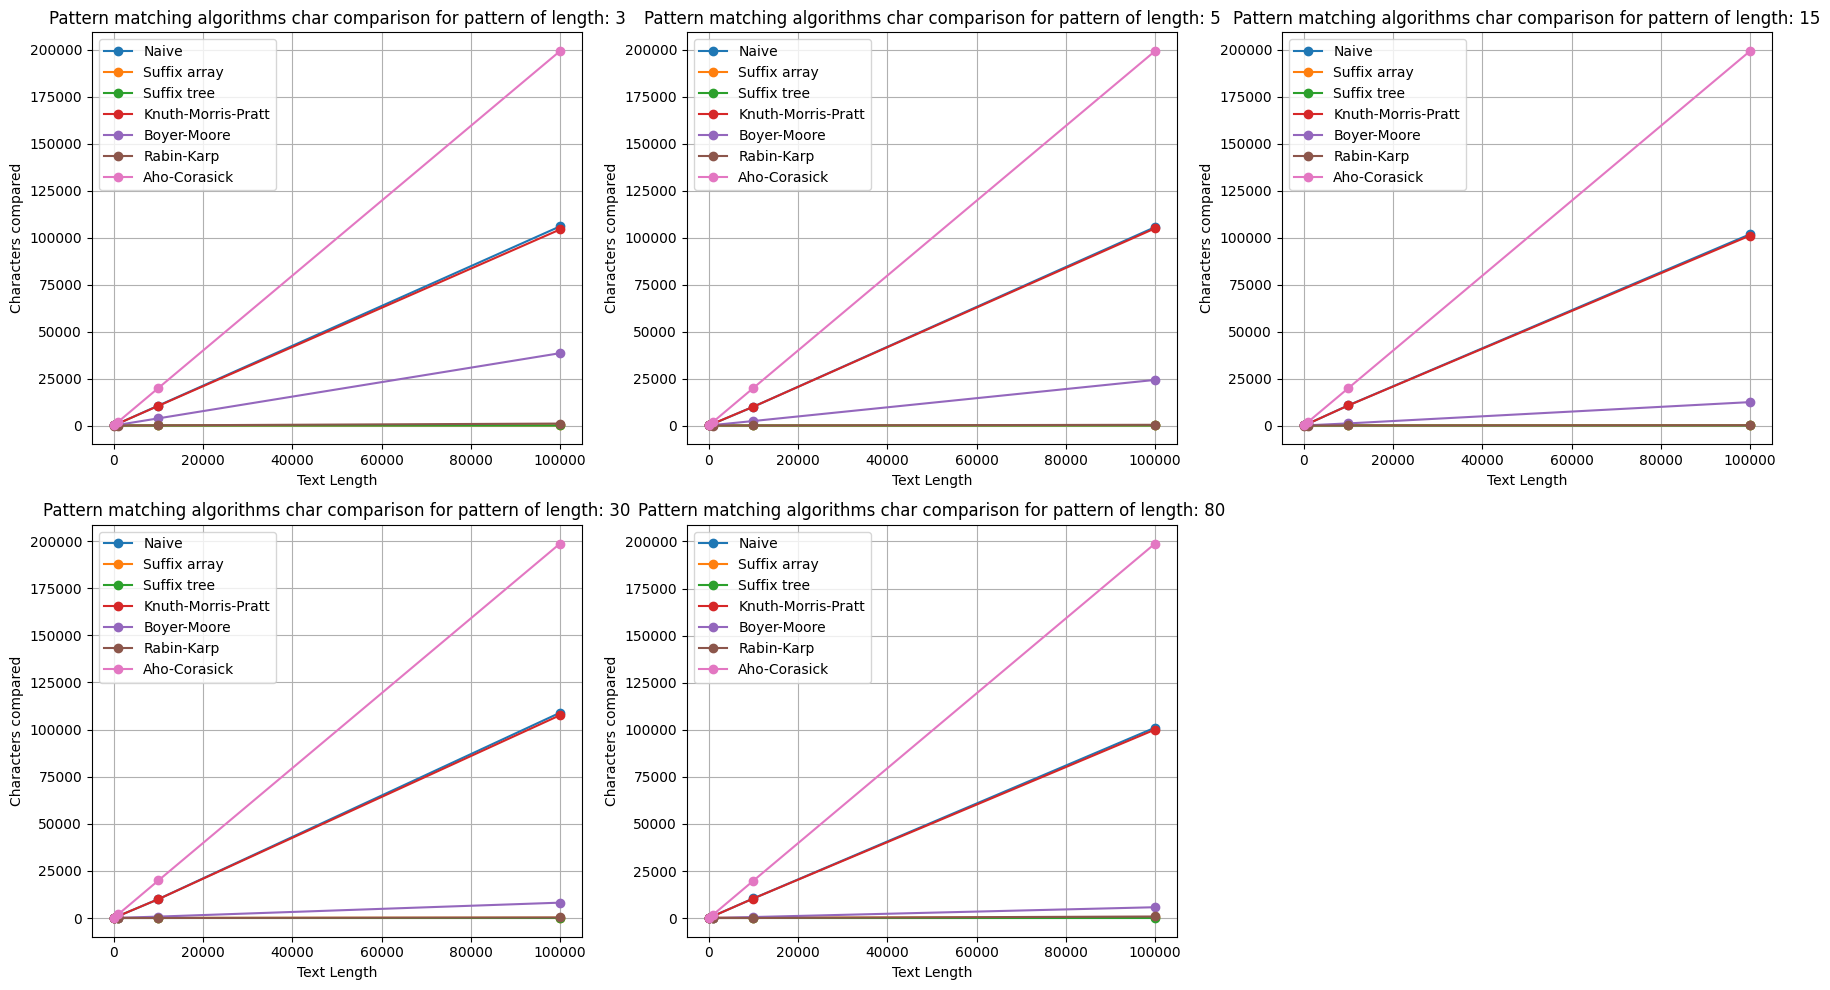

In [19]:
df_comp_reset = df_comp.reset_index()

algorithms = df_comp_reset['Algorithm'].unique()
pattern_lengths = df_comp_reset['Pattern Length'].unique()

n = len(pattern_lengths)
cols = 3
rows = (n + cols - 1) // cols

plt.figure(figsize=(cols * 6, rows * 5))

for i, pattern_len in enumerate(sorted(pattern_lengths), 1):
    plt.subplot(rows, cols, i)
    
    for algo in algorithms:
        subset = df_comp_reset[(df_comp_reset['Algorithm'] == algo) & 
                               (df_comp_reset['Pattern Length'] == pattern_len)]
        
        plt.plot(subset['Text Length'], subset['Characters comparison'], marker='o', label=algo)
    
    plt.xlabel('Text Length')
    plt.ylabel('Characters compared')
    plt.title(f'Pattern matching algorithms char comparison for pattern of length: {pattern_len}')
    # plt.xscale('log')
    # plt.yscale('log')
    plt.grid(True)
    plt.legend()

plt.tight_layout()
plt.show()

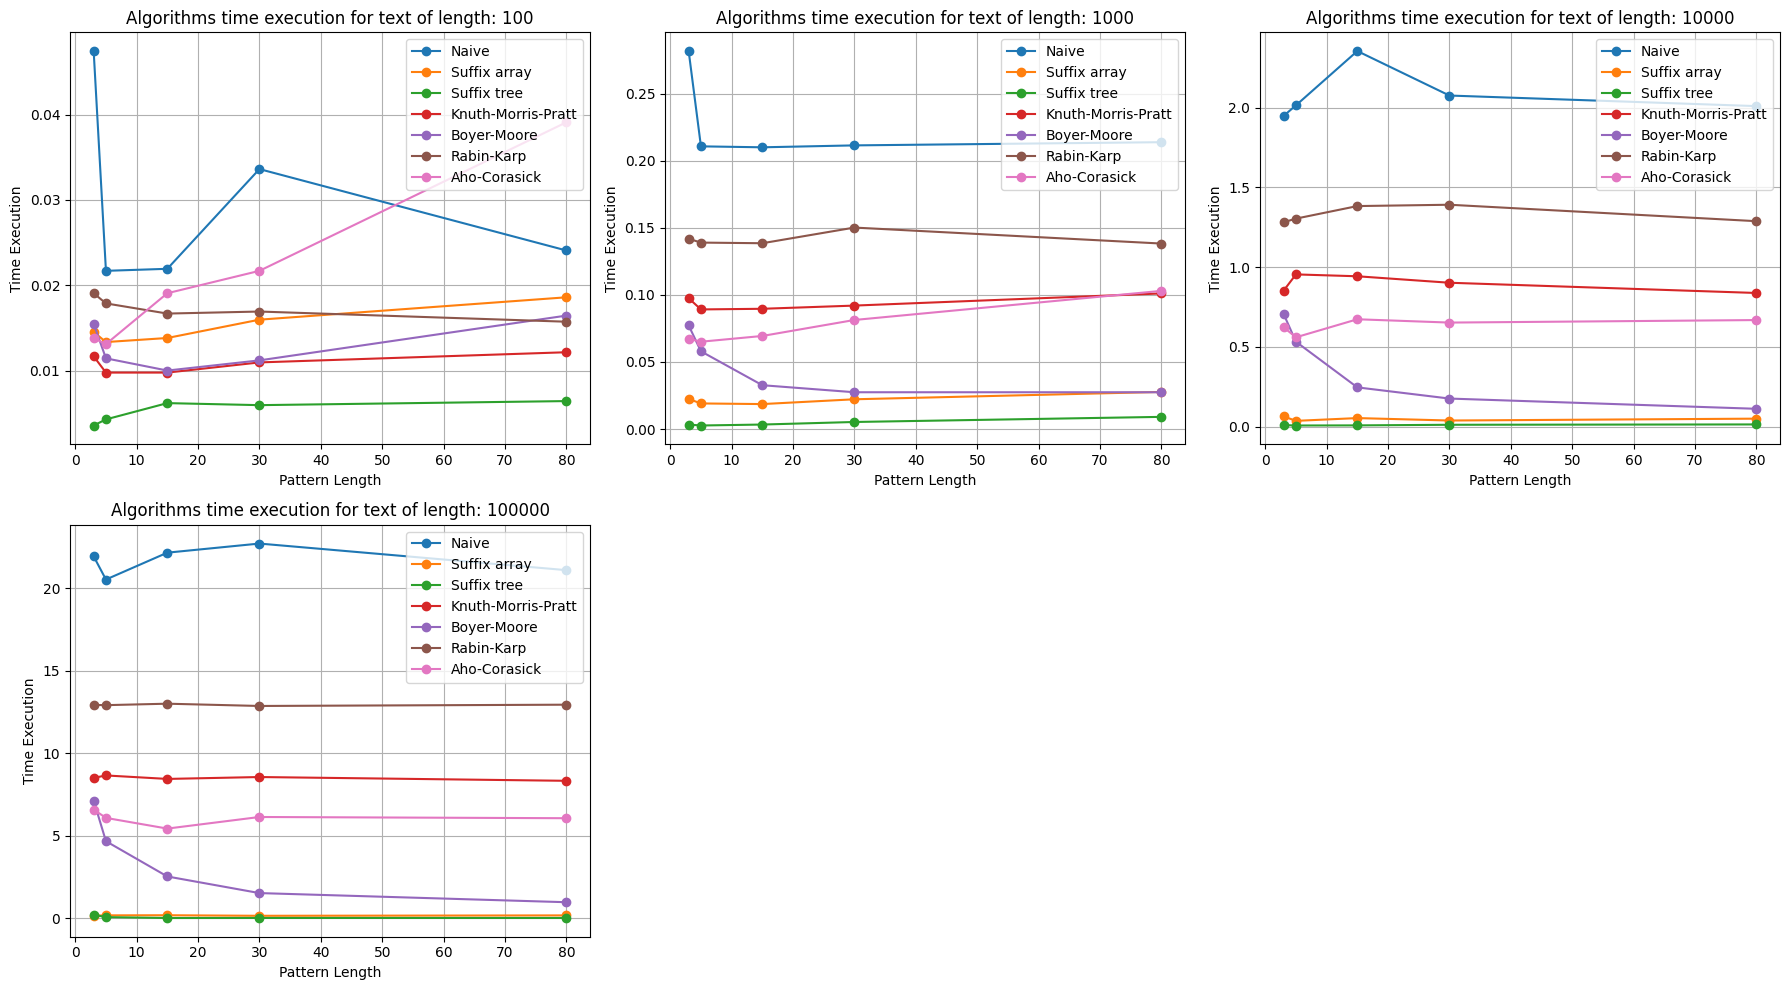

In [20]:
df_time_reset = df_time.reset_index()
df_time_reset

algorithms = df_time_reset['Algorithm'].unique()
pattern_lengths = df_time_reset['Pattern Length'].unique()
text_lengths = df_time_reset['Text Length'].unique()

n = len(pattern_lengths)
cols = 3
rows = (n + cols - 1) // cols

plt.figure(figsize=(cols * 6, rows * 5))

for i, text_len in enumerate(sorted(text_lengths), 1):
    plt.subplot(rows, cols, i)
    
    for algo in algorithms:
        subset = df_time_reset[(df_time_reset['Algorithm'] == algo) & 
                               (df_time_reset['Text Length'] == text_len)]
        
        plt.plot(pattern_lengths, subset['Time execution'], marker='o', label=algo)
    
    plt.xlabel('Pattern Length')
    plt.ylabel('Time Execution')
    plt.title(f'Algorithms time execution for text of length: {text_len}')
    # plt.xscale('log')
    # plt.yscale('log')
    plt.grid(True)
    plt.legend()

plt.tight_layout()
plt.show()

## Plotting results with more samples

In [21]:
import random
import numpy as np

def randtext(size: int) -> str:
    return "".join( (chr(ord('a') + random.randint(0,25))) for _ in range(size) )

In [22]:
dtime = dict()
dmem = dict()
dcomp = dict()
sizes_t = np.linspace(10,5e4,10, dtype=int)
sizes_p = np.linspace(10,5e3,5, dtype=int)

for size_t in sizes_t:
    text = randtext(size_t)
    for size_p in sizes_p:
        pattern = randtext(size_p)
        result = compare_pattern_matching_algorithms(text, pattern)
        for algorithm in result.keys():
            dtime[(algorithm, size_t, size_p)] = result[algorithm]["execution_time_ms"]
            dmem[(algorithm, size_t, size_p)] = result[algorithm]["memory_usage_kb"]
            dcomp[(algorithm, size_t, size_p)] = result[algorithm]["compares"]

In [23]:
df_time = pd.Series(dtime)
df_time.name = 'Time execution'
df_time.index.names = ['Algorithm', 'Text Length', 'Pattern Length']
df_time.unstack()

Pattern Length                10        1257       2505      3752       5000
Algorithm    Text Length                                                    
Aho-Corasick 10           0.018835  0.815392   1.847982  2.139568  67.575693
             5564         0.312328  0.831127   1.558781  2.049685   3.100157
             11118        0.674486  1.555204   2.022982  2.528906   3.103733
             16673        0.936985  1.430750  57.156801  3.026009   4.069328
             22227        1.272917  1.808882   2.403259  3.108501   3.807783
...                            ...       ...        ...       ...        ...
Suffix tree  27782        0.006676  0.009060   0.007629  0.012159   0.006199
             33336        0.008106  0.009298   0.006437  0.005484   0.006676
             38891        0.005960  0.009537   0.007153  0.007391   0.006437
             44445        0.005960  0.006199   0.005722  0.006437   0.011206
             50000        0.009298  0.006437   0.006199  0.006199   0.007391

[70 rows x 5 columns]

### Time execution vs text length

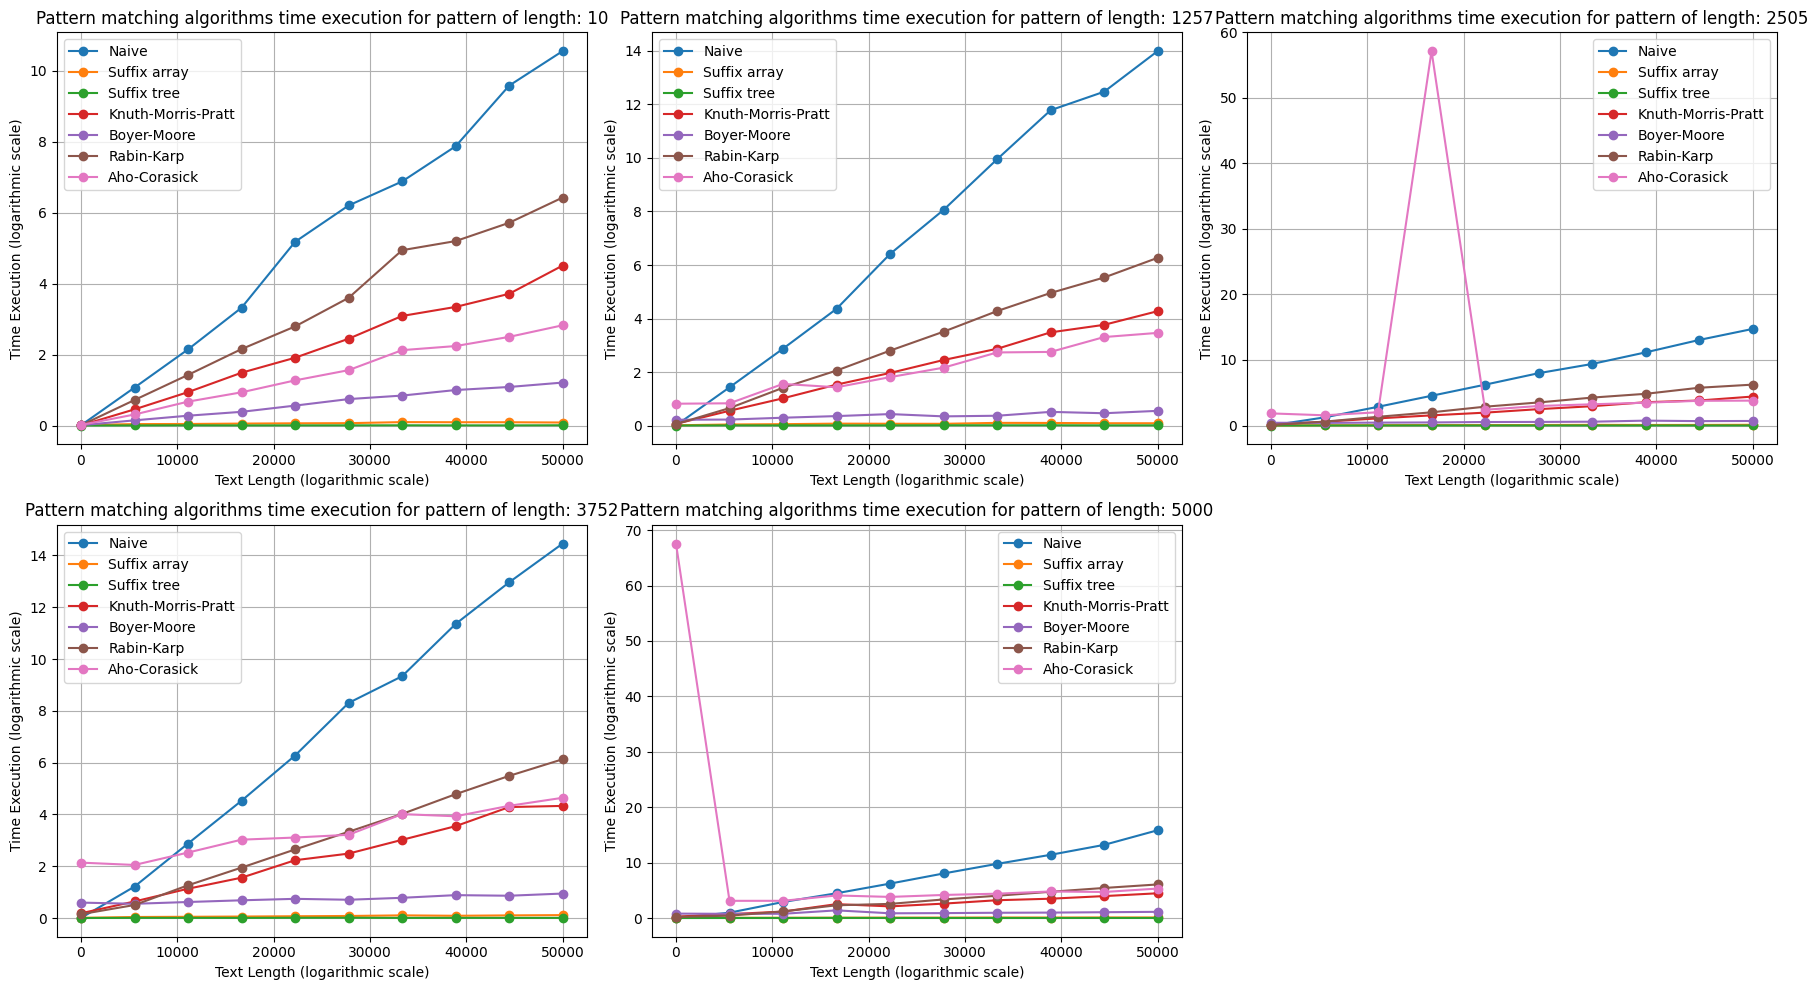

In [24]:
df_time_reset = df_time.reset_index()

algorithms = df_time_reset['Algorithm'].unique()
pattern_lengths = df_time_reset['Pattern Length'].unique()

n = len(pattern_lengths)
cols = 3
rows = (n + cols - 1) // cols

plt.figure(figsize=(cols * 6, rows * 5))

for i, pattern_len in enumerate(sorted(pattern_lengths), 1):
    ax = plt.subplot(rows, cols, i)
    
    for algo in algorithms:
        subset = df_time_reset[(df_time_reset['Algorithm'] == algo) & 
                               (df_time_reset['Pattern Length'] == pattern_len)]
        plt.plot(subset['Text Length'], subset['Time execution'], marker='o', label=algo)
    
    plt.xlabel('Text Length (logarithmic scale)')
    plt.ylabel('Time Execution (logarithmic scale)')
    plt.title(f'Pattern matching algorithms time execution for pattern of length: {pattern_len}')
    # plt.xscale('log')
    # plt.yscale('log')
    plt.grid(True)
    plt.legend()

plt.tight_layout()
plt.show()

### Memory usage vs text length

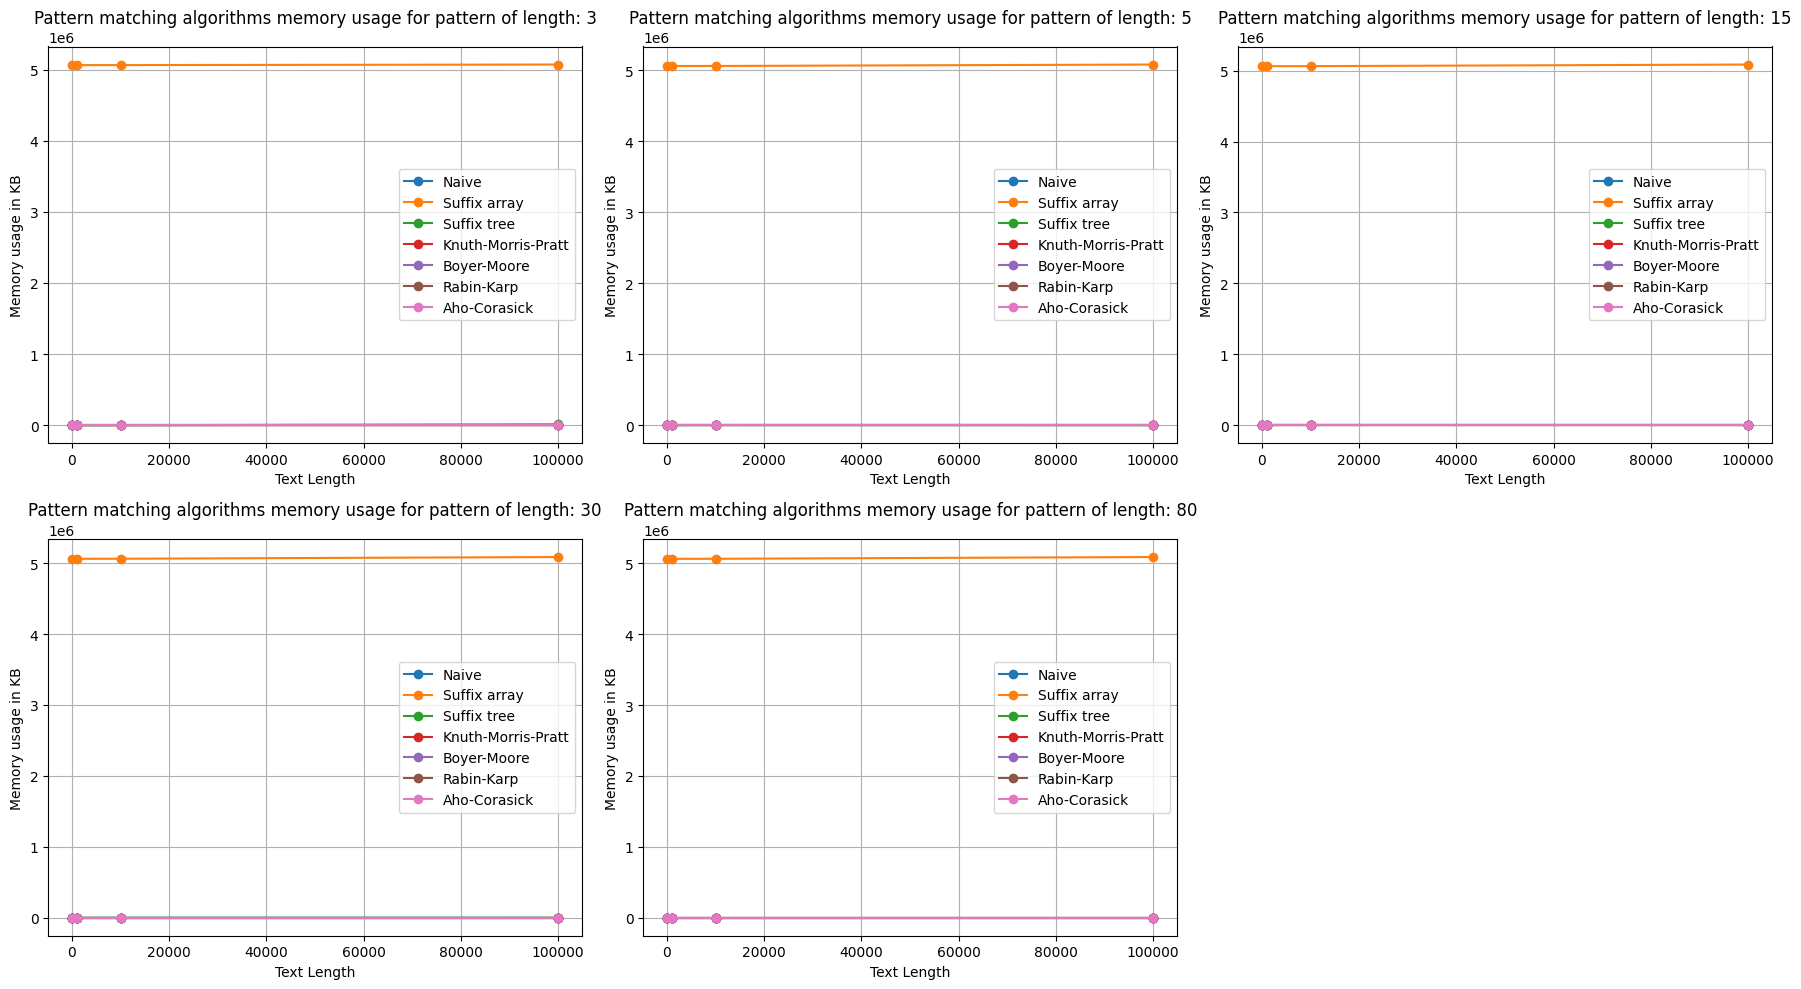

In [25]:
df_mem_reset = df_mem.reset_index()

algorithms = df_mem_reset['Algorithm'].unique()
pattern_lengths = df_mem_reset['Pattern Length'].unique()

n = len(pattern_lengths)
cols = 3
rows = (n + cols - 1) // cols

plt.figure(figsize=(cols * 6, rows * 5))

for i, pattern_len in enumerate(sorted(pattern_lengths), 1):
    ax = plt.subplot(rows, cols, i)
    
    for algo in algorithms:
        subset = df_mem_reset[(df_mem_reset['Algorithm'] == algo) & 
                               (df_mem_reset['Pattern Length'] == pattern_len)]
        plt.plot(subset['Text Length'], subset['Memory usage'], marker='o', label=algo)
            
    plt.xlabel('Text Length')
    plt.ylabel('Memory usage in KB')
    plt.title(f'Pattern matching algorithms memory usage for pattern of length: {pattern_len}')
    # plt.xscale('log')
    # plt.yscale('log')
    plt.grid(True)
    plt.legend()

plt.tight_layout()
plt.show()

### Number of comparisons vs text length

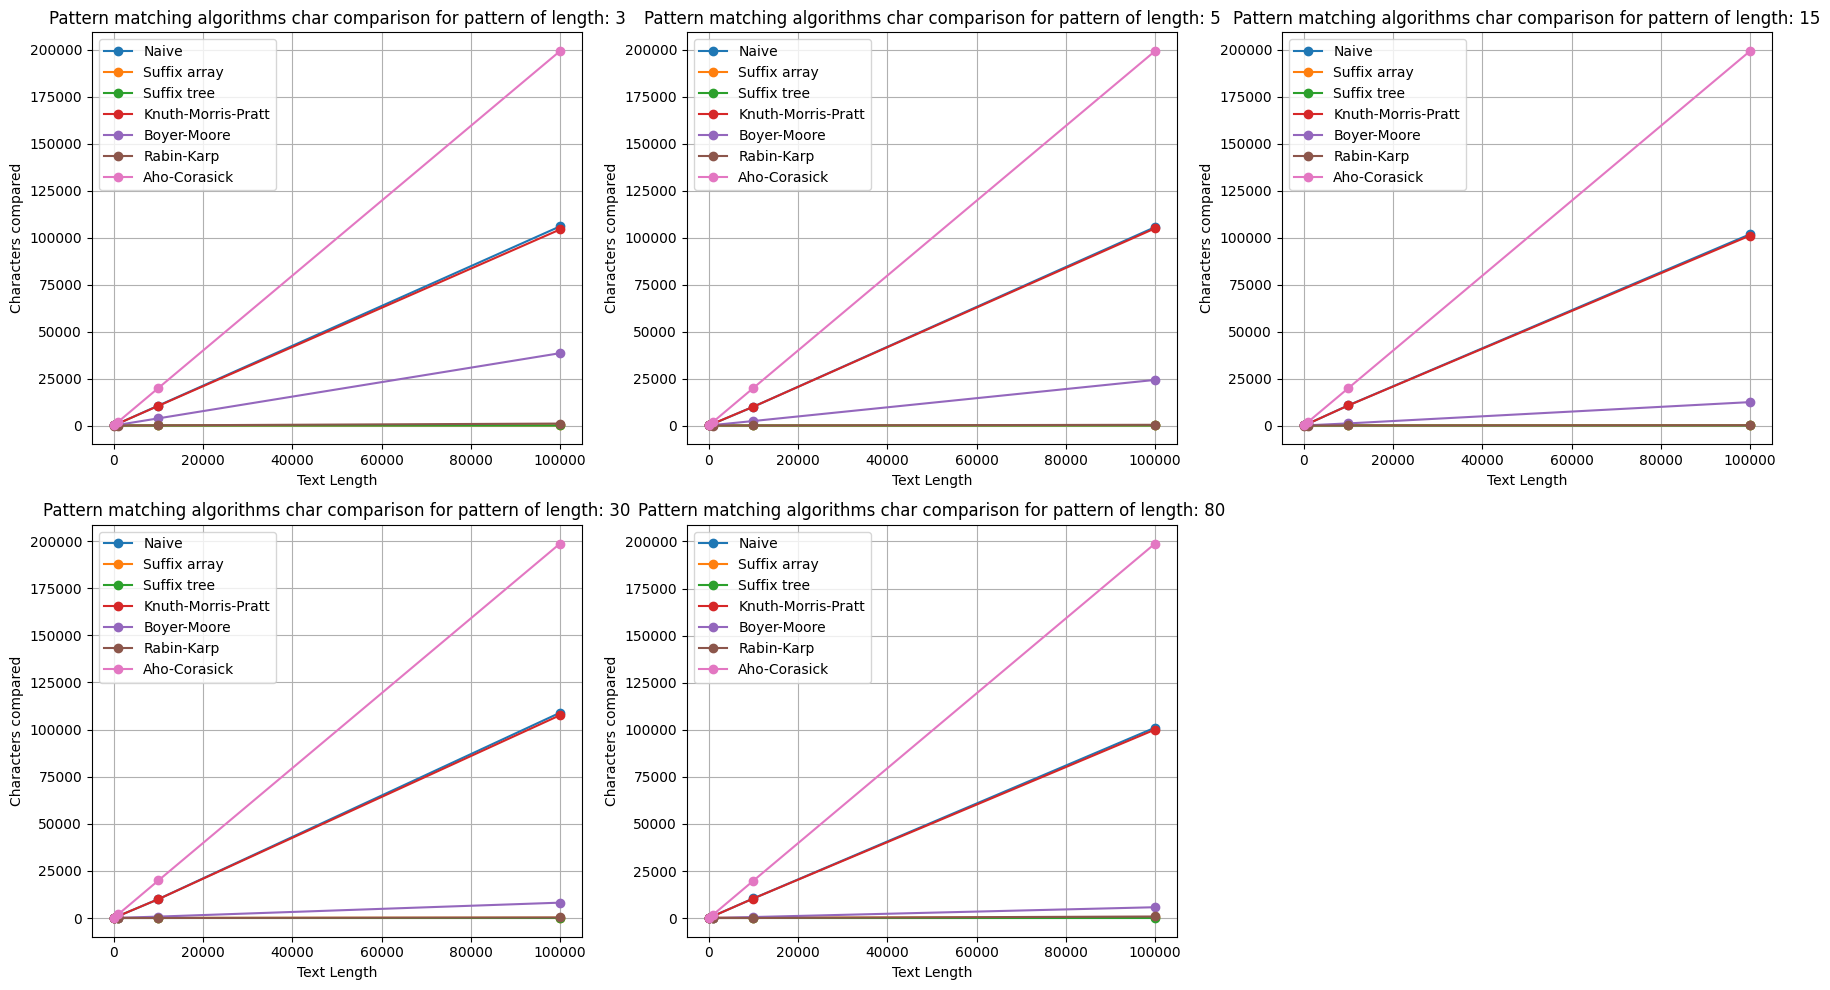

In [26]:
df_comp_reset = df_comp.reset_index()

algorithms = df_comp_reset['Algorithm'].unique()
pattern_lengths = df_comp_reset['Pattern Length'].unique()

n = len(pattern_lengths)
cols = 3
rows = (n + cols - 1) // cols

plt.figure(figsize=(cols * 6, rows * 5))

for i, pattern_len in enumerate(sorted(pattern_lengths), 1):
    ax = plt.subplot(rows, cols, i)
    
    for algo in algorithms:
        subset = df_comp_reset[(df_comp_reset['Algorithm'] == algo) & 
                               (df_comp_reset['Pattern Length'] == pattern_len)]
        plt.plot(subset['Text Length'], subset['Characters comparison'], marker ='o', label=algo)
    
    plt.xlabel('Text Length')
    plt.ylabel('Characters compared')
    plt.title(f'Pattern matching algorithms char comparison for pattern of length: {pattern_len}')
    # plt.xscale('log')
    # plt.yscale('log')
    plt.grid(True)
    plt.legend()

plt.tight_layout()
plt.show()

### Time execution vs pattern length

In [33]:
dtime = dict()
sizes_p = np.linspace(10,5e3,10, dtype=int)

text = randtext(100000)
for size_p in sizes_p:
    pattern = randtext(size_p)
    result = compare_pattern_matching_algorithms(text, pattern)
    for algorithm in result.keys():
        dtime[(algorithm, size_p)] = result[algorithm]["execution_time_ms"]

In [34]:
df_time = pd.Series(dtime)
df_time.name = 'Time execution'
df_time.index.names = ['Algorithm', 'Pattern Length']
df_time.unstack()

Pattern Length,10,564,1118,1673,2227,2782,3336,3891,4445,5000
Algorithm,,,,,,,,,,
Aho-Corasick,5.725145,6.037474,6.124973,6.762505,6.853342,7.081747,7.390022,7.635117,98.503351,8.020878
Boyer-Moore,2.466440,0.890732,0.801563,0.910044,0.937223,1.193285,1.231670,1.467228,1.446962,1.322031
Knuth-Morris-Pratt,8.426666,8.796215,8.950472,8.823633,8.684397,8.718967,8.698225,8.675575,8.864403,8.632660
Naive,23.426771,24.207830,28.411150,28.665543,30.279875,29.645681,30.661821,30.652523,30.744553,31.482935
Rabin-Karp,13.019800,13.146162,13.026476,13.008356,12.810946,12.753010,12.819767,12.520075,12.621641,12.482643
Suffix array,0.139475,0.164747,0.157595,0.160217,0.225782,0.165939,0.142097,0.152349,0.152349,0.190735
Suffix tree,0.018358,0.008106,0.007153,0.010490,0.012398,0.008106,0.006437,0.006914,0.013590,0.010967


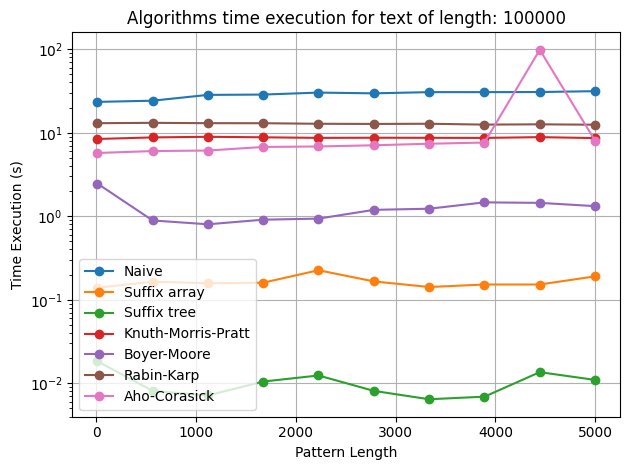

In [35]:
df_time_reset = df_time.reset_index()
df_time_reset

algorithms = df_time_reset['Algorithm'].unique()
pattern_lengths = df_time_reset['Pattern Length'].unique()

n = len(pattern_lengths)
cols = 3
rows = (n + cols - 1) // cols

ax = plt.gca()
    
for algo in algorithms:
    subset = df_time_reset[(df_time_reset['Algorithm'] == algo)]
    plt.plot(pattern_lengths, subset['Time execution'], marker='o', label=algo)

plt.xlabel('Pattern Length')
plt.ylabel('Time Execution (s)')
plt.title(f'Algorithms time execution for text of length: 100000')
# plt.xscale('log')
plt.yscale('log')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

## Conclusions
Naive algorithm takes more time to execute for longer texts